Dataset: https://archive.ics.uci.edu/dataset/73/mushroom


Relevant Information:
    This data set includes descriptions of hypothetical samples
    corresponding to 23 species of gilled mushrooms in the Agaricus and
    Lepiota Family (pp. 500-525).  Each species is identified as
    definitely edible, definitely poisonous, or of unknown edibility and
    not recommended.  This latter class was combined with the poisonous
    one.  The Guide clearly states that there is no simple rule for
    determining the edibility of a mushroom; no rule like ``leaflets
    three, let it be'' for Poisonous Oak and Ivy.
    
Attribute Information: (classes: edible=e, poisonous=p)



Logical rules for the mushroom data sets.

	Logical rules given below seem to be the simplest possible for the
	mushroom dataset and therefore should be treated as benchmark results.

	Disjunctive rules for poisonous mushrooms, from most general
	to most specific:

	P_1) odor=NOT(almond.OR.anise.OR.none)
	     120 poisonous cases missed, 98.52% accuracy

	P_2) spore-print-color=green
	     48 cases missed, 99.41% accuracy
         
	P_3) odor=none.AND.stalk-surface-below-ring=scaly.AND.
	          (stalk-color-above-ring=NOT.brown) 
	     8 cases missed, 99.90% accuracy
         
	P_4) habitat=leaves.AND.cap-color=white
	         100% accuracy     

	Rule P_4) may also be

	P_4') population=clustered.AND.cap_color=white

	These rule involve 6 attributes (out of 22). Rules for edible
	mushrooms are obtained as negation of the rules given above, for
	example the rule:

	odor=(almond.OR.anise.OR.none).AND.spore-print-color=NOT.green

	gives 48 errors, or 99.41% accuracy on the whole dataset.

	Several slightly more complex variations on these rules exist,
	involving other attributes, such as gill_size, gill_spacing,
	stalk_surface_above_ring, but the rules given above are the simplest
	we have found.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [30]:
df = pd.read_csv('/kaggle/input/dataset-lesson7/dataset_mushrooms.csv')
df.head(5)

,shape,surface,color,bruises,odor,attachment,spacing,size,color.1,shape.1,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [31]:
df.describe().T

,count,unique,top,freq
shape,8124,2,e,4208
surface,8124,6,x,3656
color,8124,4,y,3244
bruises,8124,10,n,2284
odor,8124,2,f,4748
attachment,8124,9,n,3528
spacing,8124,2,f,7914
size,8124,2,c,6812
color.1,8124,2,b,5612
shape.1,8124,12,b,1728


- we can seee that veil-type is not informative. we can remove it

In [33]:
df.isnull().values.any()

False

- we can see that first column is our target with classes for classification

In [47]:
df2=df.rename(columns={'shape': 'class'})
df3=df2.drop(['veil-type'], axis=1)
df3.head()

,class,surface,color,bruises,odor,attachment,spacing,size,color.1,shape.1,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


### Dataset Coding

In [49]:
from sklearn.preprocessing import LabelEncoder


labelencoder=LabelEncoder()
for col in df3.columns:
    df3[col] = labelencoder.fit_transform(df3[col])
 
df3.head()

,class,surface,color,bruises,odor,attachment,spacing,size,color.1,shape.1,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [50]:
#Check values for target variable
print(df3.groupby('class').size())

class
0    4208
1    3916
dtype: int64


- data looks pretty balanced

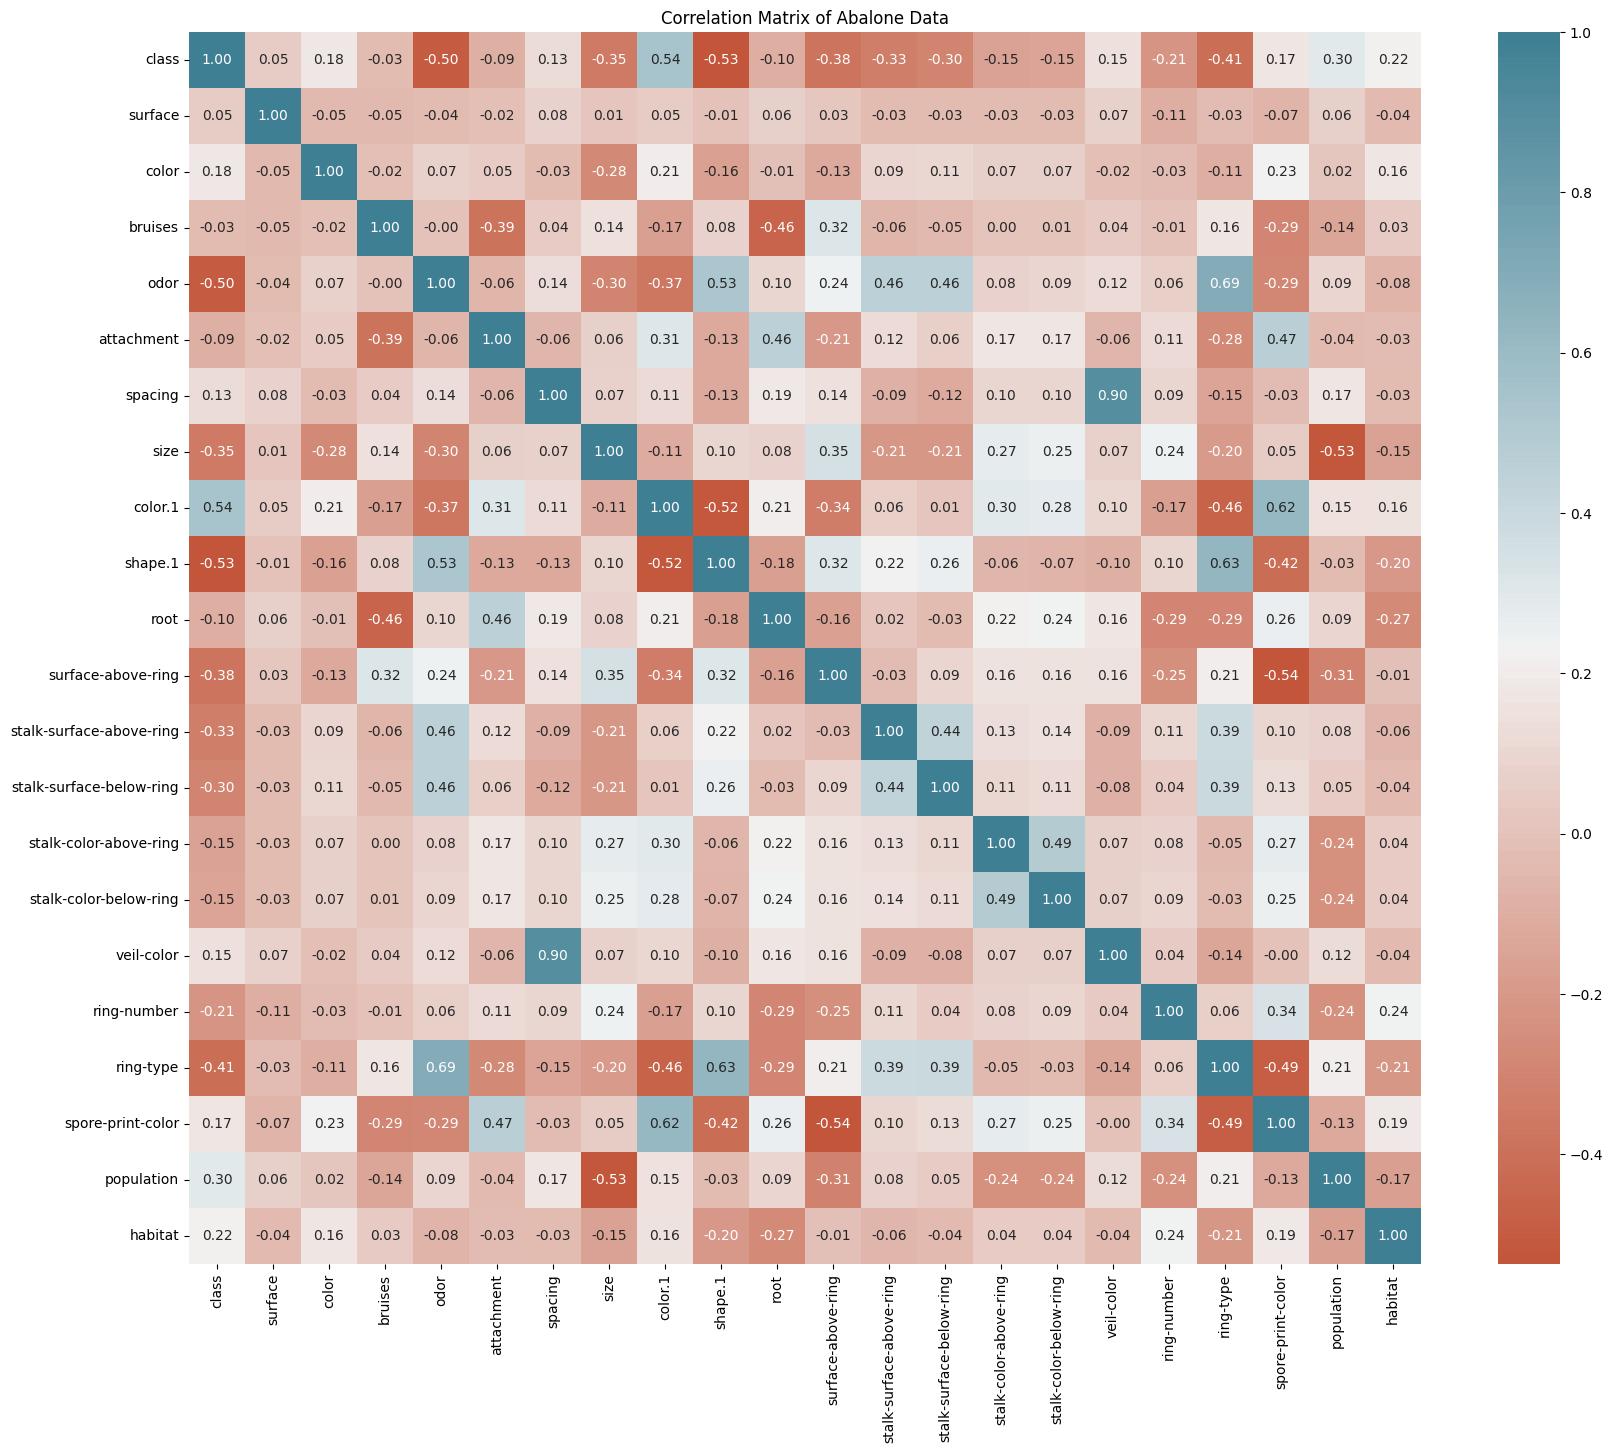

In [51]:
corr = df3.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True,  cmap=sns.diverging_palette(20, 220, n=200), square=True, fmt=".2f")
plt.title('Correlation Matrix of Abalone Data')
plt.show()

# Training

- One-hot-encoding with pandas_get_dummies() will be performed on training data.
- Binary labels will be encoded using sklearn LabelEncoder() which means Label encoding is simply converting each value in a column to a number.

In [55]:
X = df3.drop(["class"], axis=1)
y = df3["class"]
X = pd.get_dummies(X)

le = LabelEncoder()
y = le.fit_transform(y)

Accuracy is: 0.9963076923076923
Recall score is: 0.994
Precision score is: 0.999
F1 score is: 0.996
Confusion matrix:
 [[833   1]
 [  5 786]]


/tmp/ipykernel_33/316978477.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_33/316978477.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


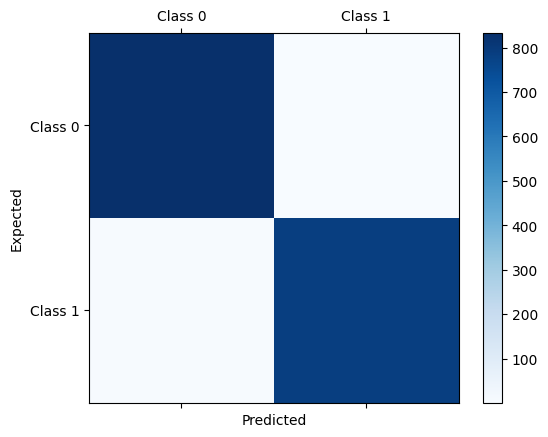

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = KNeighborsClassifier(n_neighbors=16,weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Accuracy is: "+ str(model.score(X_test,y_test)))
print("Recall score is: " + str(round(recall_score(y_test,y_pred),3)))
print("Precision score is: " + str(round(precision_score(y_test,y_pred),3)))
print("F1 score is: " + str(round(f1_score(y_test, y_pred),3)))


###################################################################################
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()